Simple sentiment analysis
-------------------------

This program uses a neural network with Keras to detect faces in a video stream. It then uses deepface to analyze the sentiment of the detected faces.
The sentiment is then displayed on the screen.

## DATA

- Input: 48 x 48 image
- Ourput: seniment (from 1 to 6)



In [38]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm import tqdm

In [13]:
# Load data
data = pd.read_csv('data/data.csv')
data.pixels = data.pixels.apply(lambda x: np.array(x.split(), dtype='float32').reshape(48, 48))
# Normalize data
data.pixels = data.pixels.apply(lambda x: x / 255)
print(data.pixels[0].shape)
data.head()

(48, 48)


,emotion,pixels
0,0,"[[0.27450982, 0.3137255, 0.32156864, 0.2823529..."
1,0,"[[0.5921569, 0.5882353, 0.5764706, 0.60784316,..."
2,2,"[[0.90588236, 0.83137256, 0.6117647, 0.6431373..."
3,4,"[[0.09411765, 0.1254902, 0.14117648, 0.1176470..."
4,6,"[[0.015686275, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."


In [14]:
# Split data into train and test
train, test = train_test_split(data, test_size=0.2)

<BarContainer object of 7 artists>

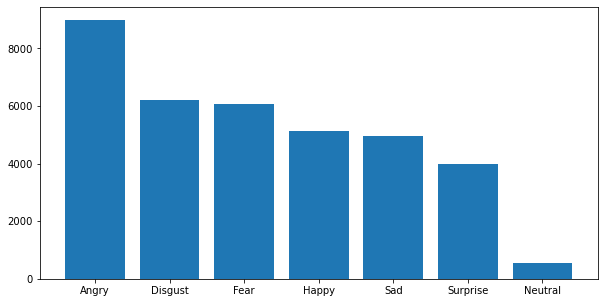

In [15]:
outputs = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
# Bar plot of the number of images per emotion
plt.figure(figsize=(10, 5))
plt.bar(outputs.values(), data['emotion'].value_counts())

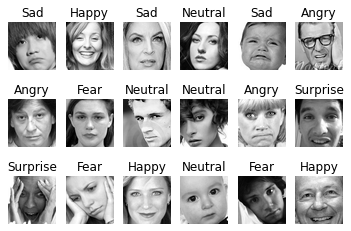

In [16]:
# Plot some images

for i in range(18):
    plt.subplot(3, 6, i + 1)
    plt.imshow(train.pixels.iloc[i][:,:], cmap='gray')
    plt.title(outputs[train.emotion.iloc[i]])
    plt.axis('off')

In [8]:
# Create a model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [17]:
# Convert data to numpy arrays
X_train = np.array(train.pixels.tolist())
y_train = np.array(train.emotion.tolist())

X_test = np.array(test.pixels.tolist())
y_test = np.array(test.emotion.tolist())
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(28709, 48, 48) (28709,) (7178, 48, 48) (7178,)


In [18]:
y_train.shape

(28709,)

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
898/898 [==============================] - 16s 14ms/step - loss: 1.6490 - accuracy: 0.3449 - val_loss: 1.4852 - val_accuracy: 0.4242
Epoch 2/10
898/898 [==============================] - 12s 13ms/step - loss: 1.4317 - accuracy: 0.4511 - val_loss: 1.3804 - val_accuracy: 0.4648
Epoch 3/10
898/898 [==============================] - 12s 13ms/step - loss: 1.3223 - accuracy: 0.4935 - val_loss: 1.3319 - val_accuracy: 0.4929
Epoch 4/10
898/898 [==============================] - 13s 14ms/step - loss: 1.2359 - accuracy: 0.5308 - val_loss: 1.3263 - val_accuracy: 0.4918
Epoch 5/10
898/898 [==============================] - 13s 15ms/step - loss: 1.1520 - accuracy: 0.5635 - val_loss: 1.3037 - val_accuracy: 0.5088
Epoch 6/10
898/898 [==============================] - 13s 14ms/step - loss: 1.0714 - accuracy: 0.5973 - val_loss: 1.3043 - val_accuracy: 0.5093
Epoch 7/10
898/898 [==============================] - 13s 15ms/step - loss: 0.9923 - accuracy: 0.6285 - val_loss: 1.3402 - val_accuracy:

In [12]:
# Save the model
model.save('models/1_simple_sentiment_recognition_vgg16.h5')

In [19]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model('models/1_simple_sentiment_recognition_vgg16.h5')

1/1 [==============================] - 0s 142ms/step


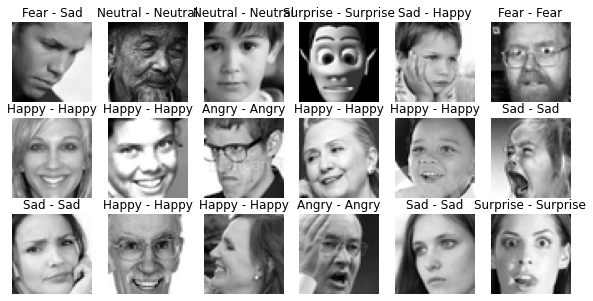

In [20]:
plt.figure(figsize=(10, 5))
images = X_test[:18].reshape(-1, 48, 48, 1)
pred_emotions = model.predict(images)
real_emotions = y_test[:18]

for i in range(18):
    plt.subplot(3, 6, i + 1)
    real = outputs[real_emotions[i]]
    pred = outputs[np.argmax(pred_emotions[i])]

    plt.imshow(images[i][:,:,0], cmap='gray')
    plt.title(f'{real} - {pred}')
    plt.axis('off')


225/225 [==============================] - 2s 9ms/step
Correct top 1 predictions: 5321/7178 = 74.12928392309836%
Correct top 2 predictions: 6335 / 7178 = 88.25578155475063%
Correct top 3 predictions: 6725 / 7178 = 93.68904987461688%
Correct top 4 predictions: 6976 / 7178 = 97.18584563945389%
Correct top 5 predictions: 7099 / 7178 = 98.89941487879632%
Correct top 6 predictions: 7160 / 7178 = 99.74923376985232%
Correct top 7 predictions: 7178 / 7178 = 100.0%


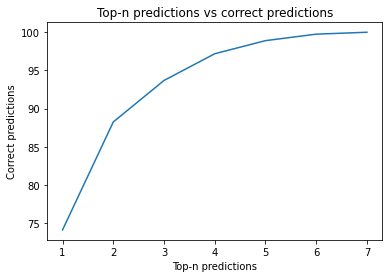

In [21]:
# Calculate the number of correct predictions vs the total number of predictions
all_predictions = model.predict(X_test.reshape(-1, 48, 48, 1), verbose=1)
total_predictions = len(all_predictions)
correct_predictions = np.sum(np.argmax(all_predictions, axis=1) == y_test)
top1_percertage = correct_predictions / total_predictions * 100
print(f'Correct top 1 predictions: {correct_predictions}/{total_predictions} = {top1_percertage}%')

# Calculate the top 2 predictions
top_2_predictions = np.argsort(all_predictions, axis=1)[:, -2:]
correct_top2_predictions = np.sum(np.any(top_2_predictions == y_test.reshape(-1, 1), axis=1))
top2_percentage = correct_top2_predictions / total_predictions * 100
print(f'Correct top 2 predictions: {correct_top2_predictions} / {total_predictions} = {top2_percentage}%')

# Calculate the top 3 predictions
top_3_predictions = np.argsort(all_predictions, axis=1)[:, -3:]
correct_top3_predictions = np.sum(np.any(top_3_predictions == y_test.reshape(-1, 1), axis=1))
top3_percentage = correct_top3_predictions / total_predictions * 100
print(f'Correct top 3 predictions: {correct_top3_predictions} / {total_predictions} = {top3_percentage}%')

# Calculate the top 4 predictions
top_4_predictions = np.argsort(all_predictions, axis=1)[:, -4:]
correct_top4_predictions = np.sum(np.any(top_4_predictions == y_test.reshape(-1, 1), axis=1))
top4_percentage = correct_top4_predictions / total_predictions * 100
print(f'Correct top 4 predictions: {correct_top4_predictions} / {total_predictions} = {top4_percentage}%')

# Calculate the top 5 predictions
top_5_predictions = np.argsort(all_predictions, axis=1)[:, -5:]
correct_top5_predictions = np.sum(np.any(top_5_predictions == y_test.reshape(-1, 1), axis=1))
top5_percentage = correct_top5_predictions / total_predictions * 100
print(f'Correct top 5 predictions: {correct_top5_predictions} / {total_predictions} = {top5_percentage}%')

# Calculate the top 6 predictions
top_6_predictions = np.argsort(all_predictions, axis=1)[:, -6:]
correct_top6_predictions = np.sum(np.any(top_6_predictions == y_test.reshape(-1, 1), axis=1))
top6_percentage = correct_top6_predictions / total_predictions * 100
print(f'Correct top 6 predictions: {correct_top6_predictions} / {total_predictions} = {top6_percentage}%')

# Calculate the top 7 predictions
top_7_predictions = np.argsort(all_predictions, axis=1)[:, -7:]
correct_top7_predictions = np.sum(np.any(top_7_predictions == y_test.reshape(-1, 1), axis=1))
top7_percentage = correct_top7_predictions / total_predictions * 100
print(f'Correct top 7 predictions: {correct_top7_predictions} / {total_predictions} = {top7_percentage}%')


# Plot the precision of top-n predictions
top_n_predictions = [1, 2, 3, 4, 5, 6, 7]
correct_top_n_predictions = [top1_percertage, top2_percentage, top3_percentage, top4_percentage, top5_percentage, top6_percentage, top7_percentage]
plt.plot(top_n_predictions, correct_top_n_predictions)
plt.xlabel('Top-n predictions')
plt.ylabel('Correct predictions')
plt.title('Top-n predictions vs correct predictions')
plt.show()

In [17]:

"""
# Stream live video from webcam gopro
gopro = cv2.VideoCapture(0)

# Create a window to display the video
cv2.namedWindow('GoPro OpenCV', cv2.WINDOW_NORMAL)

# Display the video
while True:
    # Capture frame-by-frame
    ret, frame = gopro.read()

    # Display the resulting frame
    cv2.imshow('GoPro OpenCV', frame)

    # Press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
gopro.release()
cv2.destroyAllWindows()
"""


In [22]:
def get_emotion(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Resize the frame from 4k to 48x48
    resized = cv2.resize(gray, (48, 48))

    # Predict the emotion
    prediction = model.predict(resized.reshape(-1, 48, 48, 1), verbose=0)
    emotion = outputs[np.argmax(prediction)]

    return emotion

In [30]:
# Stream live video from webcam gopro
gopro = cv2.VideoCapture(0)
print(f'Video resolution: {gopro.get(cv2.CAP_PROP_FRAME_WIDTH)}x{gopro.get(cv2.CAP_PROP_FRAME_HEIGHT)}')

# Create a window to display the video
cv2.namedWindow('GoPro OpenCV', cv2.WINDOW_NORMAL)

# Display the video
while True:
    time.sleep(1)
    # Capture frame-by-frame
    ret, frame = gopro.read()

    # Reduce the frame size
    frame = cv2.resize(frame, (256, 256))

    # Crop the frame to 48x48
    middle_index = int(frame.shape[0] / 2)
    frame = frame[middle_index - 24:middle_index + 24, middle_index - 24:middle_index + 24]

    emotion = get_emotion(frame)

    # Display the resulting frame
    cv2.imshow('GoPro OpenCV', frame)

    # Display the emotion
    cv2.putText(frame, emotion, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    print(emotion)

    # Press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
gopro.release()
cv2.destroyAllWindows()

Video resolution: 1920.0x1080.0
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Surprise
Surprise
Surprise
Surprise
Surprise
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Happy
Happy
Happy
Happy
Happy
Sad
Neutral
Neutral
Angry
Angry
Fear
Fear
Sad
Angry
Fear
Fear
Fear
Fear
Sad
Fear
Fear
Fear
Fear
Neutral
Neutral
Fear
Surprise
Fear
Fear
Fear
Neutral
Sad
Angry
Fear
Neutral
Fear
Fear
Fear
Neutral
Fear
Fear
Fear
Angry
Angry
Sad
Surprise
Happy
Surprise
Surprise
Surprise
Surprise
Surprise
Surprise
Surprise
Surprise
Neutral
Happy
Angry
Surprise
Surprise
Angry
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Angry
Fear
Fear
Fear
Angry
Fear
Fear
Angry
Angry
Fear
Fear
Fear
Happy
Fear
Fear
Fear
Fear
Fear
Fear
Sad
Angry
Angry
Fear
Fear
Fear
Angry
Neutral
Happy
Happy
Fear
Angry
Fear
Surprise
Fear
Fear
Neutral
Neutral
Happy
Happy
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Sad
Sad
Fea